# Transfer functions of finite difference schemes

This notebook allows you to compute and vizualize transfer functions corresponding to finite difference schemes (on a regular 1-D grid), and to compare them with the exact transfer functions corresponding to continuous derivation operators.


## Notations

Let consider a regular 1-D grid, with a constant mesh size $h$.
We want to check, in terms of transfer functions (i.e. in the Fourier space), the quality of the approximation:
$$
u^{(p)}(x) \simeq \sum_{j=j_1}^{j=j_2} \alpha_j\, u(x+jh)
$$
where $p\in N$ and $j_1, j_2 \in Z$.


## Transfer functions

The transfer function of the exact continuous $p$-order derivative is
$$
T_{exact}(\omega) = (i\, \omega)^p =  \omega^p\, e^{ip\pi/2} = \omega^p\, \cos\left(p\frac{\pi}{2}\right) + i\, \omega^p\, \sin\left(p\frac{\pi}{2}\right)
$$

The transfer function of the numerical scheme is
$$
T_{approx}(\omega) = \sum_{j=j_1}^{j=j_2} \alpha_j\, e^{ij\omega} = \left( \sum_{j=j_1}^{j=j_2} \alpha_j\, \cos(j\omega) \right) + i \, \left( \sum_{j=j_1}^{j=j_2} \alpha_j\, \sin(j\omega) \right)
$$

In [1]:
from math import *
import matplotlib.pyplot as plt

In [2]:
# computation of transfer functions

N = 100 # sampling for the frequency domain: N+2 values of \omega , from 0 to \pi
x = [k*pi/N for k in range(N+1)]  # x goes from 0 to pi, with a regular step pi/100


def transfer(ndiff,jinf,jsup,coeffs,N,x):

    RealExactTF = [x[k]**p * cos(p*pi/2) for k in range(N+1)]
    ImaginaryExactTF = [x[k]**p * sin(p*pi/2) for k in range(N+1)]

    def sumcos(omega,jinf,jsup,coeffs):
        res = 0
        for j in range(jinf, jsup+1):
            res = res + coeffs[j-jinf]*cos(j*omega)
        return res
    
    def sumsin(omega,jinf,jsup,coeffs):
        res = 0
        for j in range(jinf, jsup+1):
            res = res + coeffs[j-jinf]*sin(j*omega)
        return res


    RealApproxTF = [sumcos(x[k],-j1,j2,alpha) for k in range(N+1)]
    ImaginaryApproxTF = [sumsin(x[k],-j1,j2,alpha) for k in range(N+1)]

    return RealExactTF, ImaginaryExactTF, RealApproxTF, ImaginaryApproxTF

## Definitions of the parameters of a scheme

    - p: order of the derivative
    - j1: left span (i.e. number of grid points on the left side) of the finite difference stencil
    - j2: right span (i.e. number of grid points on the right side) of the finite difference stencil
    
Example: the scheme $\frac{u(x+h)-2u(x)+u(x-h)}{h^2} = u''(x) + {\cal O}(h^2)$ corresponds to p=2, j1=-1, j2=1.

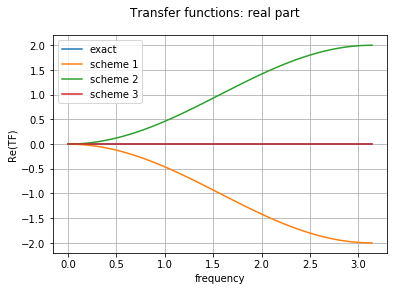

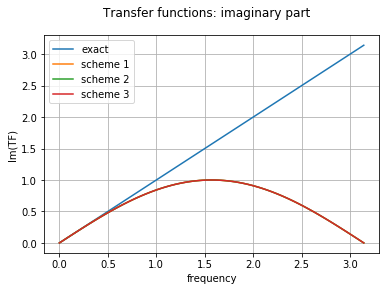

In [3]:

# first-order derivative, right-sided first-order scheme
p = 1
j1 = 0
j2 = 1
alpha = [-1, 1]

RealExact, ImaginaryExact, RealApproxScheme1, ImaginaryApproxScheme1 = transfer(p,j1,j2,alpha,N,x) 

# first-order derivative, left-sided first-order scheme
p = 1
j1 = 1
j2 = 0
alpha = [-1, 1]

RealExact, ImaginaryExact, RealApproxScheme2, ImaginaryApproxScheme2 = transfer(p,j1,j2,alpha,N,x) 


# first-order derivative, two-sided second-order scheme
p = 1
j1 = 1
j2 = 1
alpha = [-1/2, 0, 1/2]

RealExact, ImaginaryExact, RealApproxScheme3, ImaginaryApproxScheme3 = transfer(p,j1,j2,alpha,N,x) 



# plot of the transfer functions

fig, axReal = plt.subplots()
axReal.plot(x, RealExact, label='exact')
axReal.plot(x, RealApproxScheme1, label='scheme 1')
axReal.plot(x, RealApproxScheme2, label='scheme 2')
axReal.plot(x, RealApproxScheme3, label='scheme 3')
axReal.set(xlabel='frequency', ylabel='Re(TF)')
axReal.grid()
axReal.legend()
fig.suptitle('Transfer functions: real part')
#fig.savefig("test.png")
plt.show()

fig, axImaginary = plt.subplots()
axImaginary.plot(x, ImaginaryExact, label='exact')
axImaginary.plot(x, ImaginaryApproxScheme1, label='scheme 1')
axImaginary.plot(x, ImaginaryApproxScheme2, label='scheme 2')
axImaginary.plot(x, ImaginaryApproxScheme3, label='scheme 3')
axImaginary.set(xlabel='frequency', ylabel='Im(TF)')
axImaginary.grid()
axImaginary.legend()
fig.suptitle('Transfer functions: imaginary part')
plt.show()

    